In [1]:
import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings 
warnings.filterwarnings("ignore")
import os
os.chdir(r'C:\Users\Hp\Downloads\Forecasting')

In [2]:
data=pd.read_csv("data_ap.csv") 
data.columns

Index(['Date', 'Confirmed'], dtype='object')

In [3]:
data['Date']=pd.to_datetime(data.Date)


In [4]:
data.index=data['Date']


In [5]:
data=data.drop("Date",1)

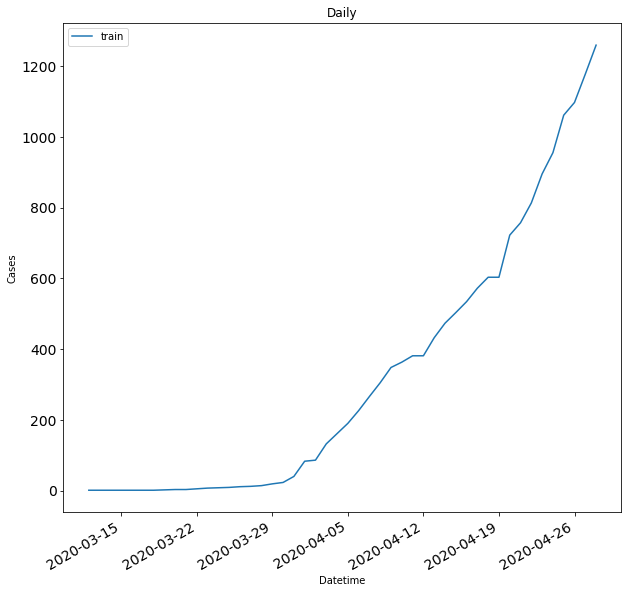

In [6]:
data.Confirmed.plot(figsize=(10,10), title= 'Daily', fontsize=14, label='train') 
#valid.Confirmed.plot(figsize=(15,8), title= 'Daily', fontsize=14, label='valid')
plt.xlabel("Datetime") 
plt.ylabel("Cases") 
plt.legend(loc='best') 
plt.show()

In [14]:
data=data.dropna()

In [10]:
import itertools
p=d=q=range(0,4)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 2, 0),
 (3, 2, 1),
 (3, 2, 2),
 (3, 2, 3),
 (3, 3, 0),
 (3, 3, 1),
 (3, 3, 2),
 (3, 3, 3)]

In [15]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(data.Confirmed,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 708.0811574289505
(0, 0, 1) 651.3766610998382
(0, 0, 2) 606.6412028380687
(0, 0, 3) 572.0780875945368
(0, 1, 0) 456.9820072732591
(0, 1, 1) 452.7100507077917
(0, 1, 2) 446.6156782990963
(0, 1, 3) 437.02742908893214
(0, 2, 0) 447.35442867532225
(0, 2, 1) 412.94178947077273
(1, 0, 0) 514.970506822905
(1, 1, 0) 446.5821465925154
(1, 1, 3) 427.8166430596157
(1, 2, 0) 423.25495290399397
(1, 2, 1) 411.8608484138873
(1, 2, 2) 413.4898992702124
(2, 0, 0) 483.85866732950467
(2, 1, 0) 433.4263472464573
(2, 2, 0) 413.33766840512965
(2, 2, 1) 413.17237569954193
(2, 2, 2) 412.28764420166783
(3, 1, 0) 426.1181894153354
(3, 1, 1) 427.7971477580587
(3, 1, 2) 427.3889904216043
(3, 2, 0) 414.5872743693144
(3, 2, 1) 412.6318208332359
(3, 2, 2) 412.9243527920744
(3, 2, 3) 414.1866473535981


In [16]:
model_arima = ARIMA(data.Confirmed,order=(1, 2, 1))
model_arima_fit = model_arima.fit()

In [17]:
predictions= model_arima_fit.forecast(steps=15)[0]
predictions.astype(int)

array([1333, 1412, 1492, 1574, 1658, 1744, 1831, 1920, 2011, 2103, 2197,
       2293, 2391, 2490, 2591])

In [18]:
predictions=pd.DataFrame(predictions)
predictions['Date']=['4/29/2020','4/30/2020','5/1/2020','5/2/2020','5/3/2020',
                   '5/4/2020','5/5/2020','5/6/2020','5/7/2020','5/8/2020',
                   '5/9/2020','5/10/2020','5/11/2020','5/12/2020','5/13/2020']
predictions['Date']=pd.to_datetime(predictions.Date)
predictions.index=predictions.Date

In [19]:
predictions

,0,Date
Date,,
2020-04-29,1333.270389,2020-04-29
2020-04-30,1412.847192,2020-04-30
2020-05-01,1492.799449,2020-05-01
2020-05-02,1574.992327,2020-05-02
2020-05-03,1658.720315,2020-05-03
2020-05-04,1744.250277,2020-05-04
2020-05-05,1831.481269,2020-05-05
2020-05-06,1920.451475,2020-05-06
2020-05-07,2011.146451,2020-05-07


In [20]:
predictions

,0,Date
Date,,
2020-04-29,1333.270389,2020-04-29
2020-04-30,1412.847192,2020-04-30
2020-05-01,1492.799449,2020-05-01
2020-05-02,1574.992327,2020-05-02
2020-05-03,1658.720315,2020-05-03
2020-05-04,1744.250277,2020-05-04
2020-05-05,1831.481269,2020-05-05
2020-05-06,1920.451475,2020-05-06
2020-05-07,2011.146451,2020-05-07


In [21]:
predictions['Date']=predictions.index

In [22]:
predictions['Day']=predictions.Date.dt.day

In [23]:
pre= pd.DataFrame(predictions[0].astype(int))

In [24]:
pre.to_csv('pre.csv')

In [25]:
x=predictions.Day
x=x.values
y=predictions[0].astype(int)


In [26]:
y

Date
2020-04-29    1333
2020-04-30    1412
2020-05-01    1492
2020-05-02    1574
2020-05-03    1658
2020-05-04    1744
2020-05-05    1831
2020-05-06    1920
2020-05-07    2011
2020-05-08    2103
2020-05-09    2197
2020-05-10    2293
2020-05-11    2391
2020-05-12    2490
2020-05-13    2591
Name: 0, dtype: int32

In [27]:
y=y.astype(int)

In [28]:
predictions = predictions.resample('D').mean() 

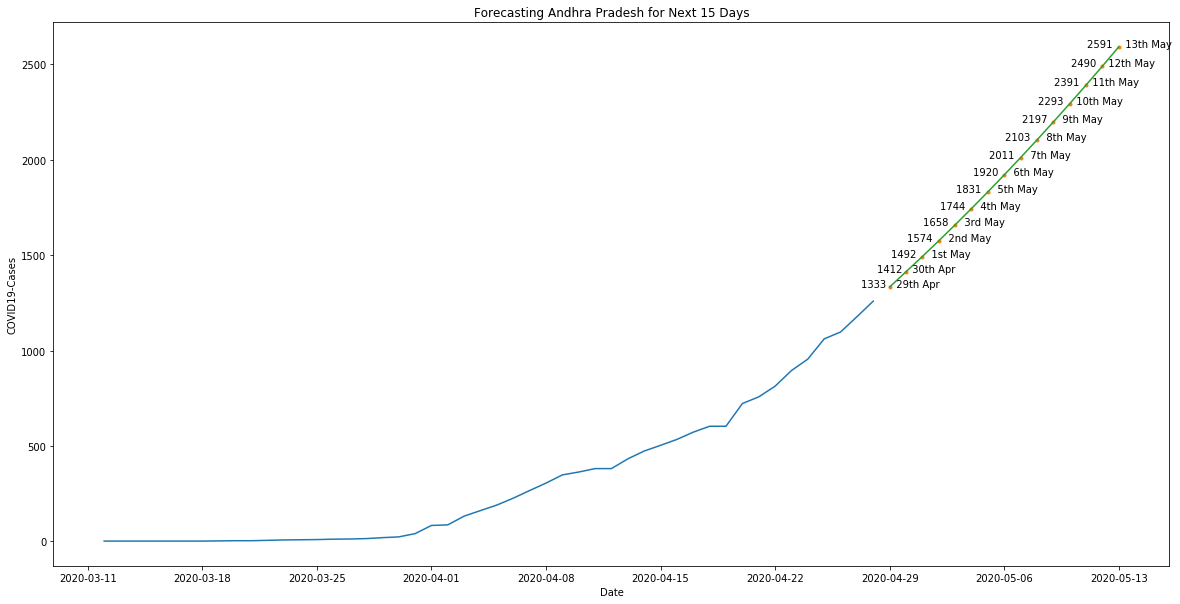

In [41]:
plt.figure(figsize=(20,10))
plt.plot(data['Confirmed'], label='Data') 
plt.plot(predictions[0],"." ,label='Predicted Cases') 
plt.plot(predictions[0],label='Predicted Cases') 
#for i_x, i_y in zip(x, y):
plt.text('4/29/2020',1333, str('1333 '),horizontalalignment='right')
plt.text('4/30/2020',1412, str('1412 '),horizontalalignment='right')
plt.text('5/1/2020',1492, str('1492  '),horizontalalignment='right')
plt.text('5/2/2020',1574, str('1574  '),horizontalalignment='right')
plt.text('5/3/2020',1658, str('1658  '),horizontalalignment='right')
plt.text('5/4/2020',1744, str('1744  '),horizontalalignment='right')
plt.text('5/5/2020',1831, str('1831  '),horizontalalignment='right')
plt.text('5/6/2020',1920, str('1920  '),horizontalalignment='right')
plt.text('5/7/2020',2011, str('2011  '),horizontalalignment='right')
plt.text('5/8/2020',2103, str('2103  '),horizontalalignment='right')
plt.text('5/9/2020',2197, str('2197  '),horizontalalignment='right')
plt.text('5/10/2020',2293, str('2293  '),horizontalalignment='right')
plt.text('5/11/2020',2391, str('2391  '),horizontalalignment='right')
plt.text('5/12/2020',2490, str('2490  '),horizontalalignment='right')
plt.text('5/13/2020',2591, str('2591  '),horizontalalignment='right')

plt.text('4/29/2020',1333, str('  29th Apr'))
plt.text('4/30/2020',1412, str('  30th Apr'))
plt.text('5/1/2020',1492, str('   1st May'))
plt.text('5/2/2020',1574, str('   2nd May'))
plt.text('5/3/2020',1658, str('   3rd May'))
plt.text('5/4/2020',1744, str('   4th May'))
plt.text('5/5/2020',1831, str('   5th May'))
plt.text('5/6/2020',1920, str('   6th May'))
plt.text('5/7/2020',2011, str('   7th May'))
plt.text('5/8/2020',2103, str('   8th May'))
plt.text('5/9/2020',2197, str('   9th May'))
plt.text('5/10/2020',2293, str('  10th May'))
plt.text('5/11/2020',2391, str('  11th May'))
plt.text('5/12/2020',2490, str('  12th May'))
plt.text('5/13/2020',2591, str('  13th May'))
plt.title('Forecasting Andhra Pradesh for Next 15 Days') 
plt.xlabel("Date") 
plt.ylabel("COVID19-Cases") 
#plt.text(y,'{},{}'.format(y))
#plt.legend(loc='best') 
plt.show()